In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data = pd.read_csv("figure6.csv")
df = pd.DataFrame(data)

In [18]:
df

,Subset Ratio,Model,Bio-conservation,Batch correction
0,10%,MINERVA,0.840,0.905
1,10%,MIDAS,0.835,0.898
2,10%,scVAEIT,0.627,0.323
3,10%,Multigrate,0.568,0.678
4,10%,totalVI,0.815,0.884
5,10%,StabMap,0.314,0.525
6,20%,MINERVA,0.840,0.898
7,20%,MIDAS,0.836,0.895
8,20%,scVAEIT,0.649,0.439
9,20%,Multigrate,0.792,0.670


In [19]:
color = {'MINERVA': '#FA7F6F', 'MIDAS': '#BEB8DC', 'scVAEIT': '#8ECFC9', 'Multigrate': '#82B0D2', 
              'totalVI': '#FFBE7A', 'StabMap': '#E7DAD2'}

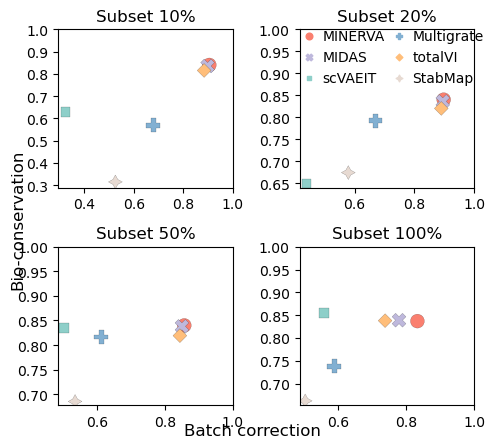

In [20]:
subset_ratios = df['Subset Ratio'].unique()

# 创建子图
fig, axes = plt.subplots(2, 2, figsize=(5, 4.5))
plt.subplots_adjust(hspace = 0.25, wspace = 0.2)
axes = axes.flatten()

# 绘制每个子集比例的散点图
for i, ratio in enumerate(subset_ratios):
    subset_df = df[df['Subset Ratio'] == ratio]
    if i != 1:
        # 不显示图例
        sns.scatterplot(data=subset_df, x='Batch correction', y='Bio-conservation', hue='Model', style='Model', s=100, ax=axes[i], palette=color, edgecolor='k', linewidth=0.1, legend=False)
    else:
        # 显示图例
        sns.scatterplot(data=subset_df, x='Batch correction', y='Bio-conservation', hue='Model', style='Model', s=100, ax=axes[i], palette=color, edgecolor='k', linewidth=0.1)
        axes[i].legend(loc=(-0.06, 0.615), frameon = False, ncol = 2, fontsize=10, markerscale = 0.8, columnspacing = 0.01, handletextpad = -0.01)
    axes[i].set_title(f'Subset {ratio}', fontsize=12) #weight='bold'
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    axes[i].grid(False)
    axes[i].set_xlim(right=1)
    axes[i].set_ylim(top=1)
    if i != 0:
        axes[i].yaxis.set_major_locator(plt.MultipleLocator(0.05))
    else:
        axes[i].yaxis.set_major_locator(plt.MultipleLocator(0.1))

    for spine in axes[i].spines.values():
        spine.set_color('black')

    
fig.text(0.5, 0.03, 'Batch correction', ha='center', va='center', fontsize = 12)
fig.text(0.03, 0.5, 'Bio-conservation', ha='center', va='center', fontsize = 12, rotation = 90)

plt.savefig('figure6.svg',dpi = 300, bbox_inches = 'tight')
plt.tight_layout()
# plt.show()